## 모델 불러오기

In [3]:
## 라이브러리 설치
##pip install trimesh

In [4]:
import trimesh
model = trimesh.load('./obj/model.stl')
model.show()

In [5]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
model.merge_vertices()
# 변수에 저장
vertices = model.vertices

## 시각화

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# plt.scatter(vertices[:,0], vertices[:,1])
# plt.scatter(vertices[:,0], vertices[:,2])
# plt.scatter(vertices[:,1], vertices[:,2])

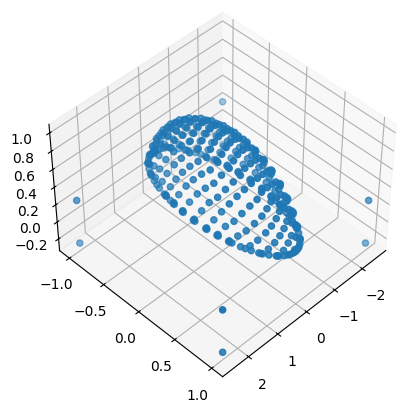

In [8]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])


## 샘플 추출
https://trimesh.org/trimesh.sample.html

In [9]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 300)
points = samples[0]
points

TrackedArray([[ 2.47257734e+00, -4.26957369e-01,  2.50000000e-01],
              [ 9.79624960e-01, -7.16018121e-01,  2.50000000e-01],
              [-1.10854562e-01, -5.03335115e-01,  8.53075014e-01],
              [ 4.99003593e-02, -3.97123581e-01,  9.13931058e-01],
              [ 2.02430967e+00, -5.29482152e-01, -2.50000000e-01],
              [-1.66721379e+00,  9.60325713e-02, -2.50000000e-01],
              [-1.78059529e+00,  6.57667312e-01, -2.50000000e-01],
              [ 2.48597872e+00,  7.04153612e-01,  2.50000000e-01],
              [-1.47553251e+00, -7.91597149e-01, -2.50000000e-01],
              [-2.04804186e+00, -9.32334225e-01,  2.50000000e-01],
              [ 1.71643342e+00,  3.52564901e-01,  2.50000000e-01],
              [ 4.23956919e-01, -7.99169417e-01, -2.50000000e-01],
              [ 1.98941537e+00, -1.00000000e+00,  1.64736944e-01],
              [ 4.71588435e-01,  8.25855367e-01,  3.01685384e-01],
              [-1.76189977e+00, -1.00000000e+00,  2.36623952e-

In [10]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

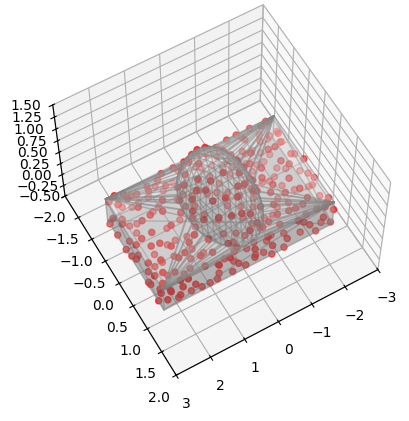

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=60, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

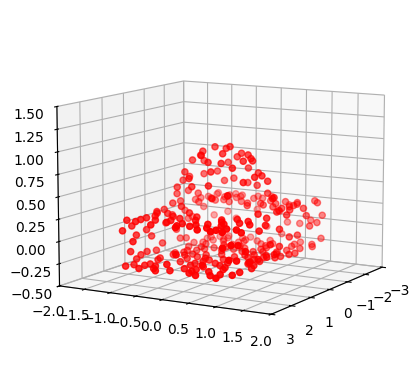

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(points)

In [15]:
df

,0,1,2
0,2.472577,-0.426957,0.250000
1,0.979625,-0.716018,0.250000
2,-0.110855,-0.503335,0.853075
3,0.049900,-0.397124,0.913931
4,2.024310,-0.529482,-0.250000
...,...,...,...
295,-1.823098,-0.965959,-0.250000
296,0.623892,-0.755663,-0.250000
297,-0.835387,0.142130,0.528504
298,-0.341639,-0.840443,0.413330


In [16]:
df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [17]:
## 불러온 값은 함수값이 아님!! 밀도값임!
## 밀도값 -> 함수값으로 변환 필요
dens = pd.read_csv("../3D/data/density.csv")
# dens
# type(dens)

In [18]:
total = dens.sum().sum()

In [19]:
pdf = dens/total
# pdf
# type(pdf)
pdf.sum().sum()

0.9999999999999999

 H[X] = –∫S p(x) log p(x)dx = –E{log p(X)}
 
When we have a sufficient number of points sampled from p, we can approximate
the expectation by the sample mean [8], which gives  H[X] = -(1/N) sigma log p(x). 


![01](./obj/img01.png)
    
![02](./obj/img02.png)


In [20]:
enp = np.log2(pdf).sum().sum()
enp

-19433861.317082167

https://github.com/cran/misc3d/blob/master/R/kde3d.R

## 점들의 위치 재조정하기

### 표면 위의 점인지 확인

### 점 위치 조정 > 표면 위 점인지 확인하는 작업 필요할 듯


표면에서 tangent vector를 따라 이동하고,
gradient descent와 Euler method를 적용


In [21]:
len(points)

300

In [22]:
# from scipy.spatial import cKDTree
# 
# tree = cKDTree(points)
# d, index = tree.query(points[0], k=2)
# d[1], index[1]

In [23]:
from scipy.spatial import cKDTree

# 점 집합 복사본
copyPoints = points.copy()

# 0본 인덱스를 시작으로 가까운 점 정렬
sort_neighbor = []
sort_neighbor.append(points[0])

# 정렬한 리스트로 들어간 점들은 삭제
copyPoints = np.delete(copyPoints, 0, axis=0)

while copyPoints.size > 0:
    # kdree 사용
    tree = cKDTree(copyPoints)
    d, index = tree.query(sort_neighbor[-1], k=1)
    
    # 가까운 점 추가
    sort_neighbor.append(copyPoints[index])
    
    # 정렬한 리스트로 들어간 점들은 삭제
    copyPoints = np.delete(copyPoints, index, axis=0)

# # 정렬된 점들을 numpy 배열로 변환
sorted_points = np.array(sort_neighbor)

# # 차분을 통해 탄젠트 벡터 계산
# tangent_vectors = np.diff(sorted_points, axis=0)

# # 단위 벡터로 표준화 (길이가 1인 벡터)
# tangent_vectors_normalized = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

In [24]:
normals = []
num_points = len(sorted_points) - 2

for i in range(num_points):
    # 세 개의 인접한 점을 선택 (간단히 인덱스를 기준으로 선택)
    p1 = np.array(sorted_points[i])
    p2 = np.array(sorted_points[(i + 1)])  # 다음 점
    p3 = np.array(sorted_points[(i + 2)])  # 다다음 점
    
    # 법선 벡터 계산
        # 벡터 v1 = p2 - p1, v2 = p3 - p1
    v1 = np.subtract(p2, p1)
    v2 = np.subtract(p3, p1)
    
    # 벡터곱 (크로스 곱)으로 법선 벡터 계산
    normal = np.cross(v1, v2)
    
    # 정규화 (길이 1로 만들기)
    norm = np.linalg.norm(normal)
    if norm != 0:
        normal = normal / norm
    
    normals.append(normal)

In [25]:
# tvec = np.diff(normals)
normals = np.array(normals)
normals

array([[-9.05906277e-01,  1.65038891e-01, -3.89994849e-01],
       [-5.78277814e-01, -1.22123002e-01, -8.06647843e-01],
       [-5.58520826e-01,  1.09737337e-01, -8.22199613e-01],
       [ 0.00000000e+00, -0.00000000e+00,  1.00000000e+00],
       [ 3.24614522e-02, -4.24233027e-01,  9.04971045e-01],
       [ 4.67481442e-01,  3.34847097e-01, -8.18131116e-01],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-1.67012140e-01, -5.52446806e-01, -8.16645255e-01],
       [ 9.43648343e-02, -4.33658916e-01, -8.96122326e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00

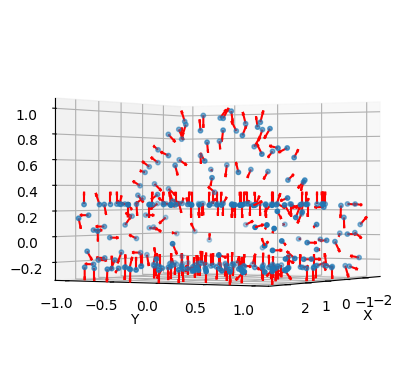

In [33]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=30)

# 플롯 보여주기
plt.show()

In [27]:
# sort_neighbor
# tangent_vectors

NameError: name 'tangent_vectors' is not defined

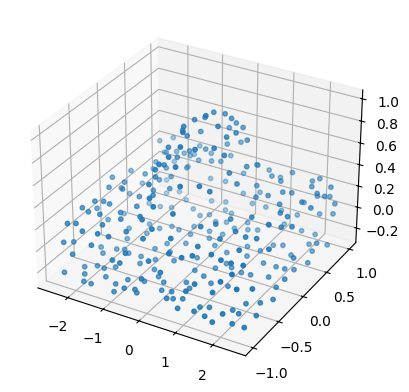

In [28]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 각 점에서 탄젠트 벡터 그리기
# for i in range(len(tangent_vectors_normalized)):
#     ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
#               tangent_vectors_normalized[i, 0], tangent_vectors_normalized[i, 1], tangent_vectors_normalized[i, 2],
#               length=0.1, color='r')
    
# 각 점에서 탄젠트 벡터 그리기
for i in range(len(tangent_vectors)):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              tangent_vectors[i, 0], tangent_vectors[i, 1], tangent_vectors[i, 2],
              length=0.5, color='r')

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

## 이동시키는 법
### 벡터에 스칼라값 곱해서
점 위치를 동일하게 떨어뜨리기 필요

In [29]:
## 점 이동 시키기
point_moved = sorted_points.copy()
point_moved[1:] = point_moved[1:] + 0.5 * tangent_vectors
point_moved

array([[-5.32518234e-01, -5.59748079e-01,  6.31941148e-01],
       [-8.23614318e-01, -2.07920062e-01,  5.85724998e-01],
       [-8.13809891e-01,  3.82497421e-02,  6.19191750e-01],
       [-9.13002556e-01,  3.52031571e-01,  3.52754884e-01],
       [-7.39609794e-01,  6.15394473e-01,  3.63066153e-01],
       [-6.60077577e-01,  8.47706990e-01,  1.80717890e-01],
       [-1.08817371e+00,  7.15071834e-01,  2.50000000e-01],
       [-9.58601631e-01,  1.14082632e+00,  2.17483945e-01],
       [-5.46090299e-01,  1.00000000e+00,  2.29068421e-01],
       [-8.03478897e-01,  1.00000000e+00, -3.72472534e-01],
       [-8.27398870e-01,  6.21236248e-01, -2.88979126e-01],
       [-9.34470705e-01,  4.38540730e-01, -2.50000000e-01],
       [-5.63999248e-01,  4.79540752e-01, -2.50000000e-01],
       [-4.14730596e-01,  2.63171734e-01, -2.50000000e-01],
       [ 1.18909862e-01,  2.42371699e-01, -2.50000000e-01],
       [ 3.22912760e-01,  4.83218994e-01, -2.50000000e-01],
       [ 3.68552155e-01,  1.25401902e-01

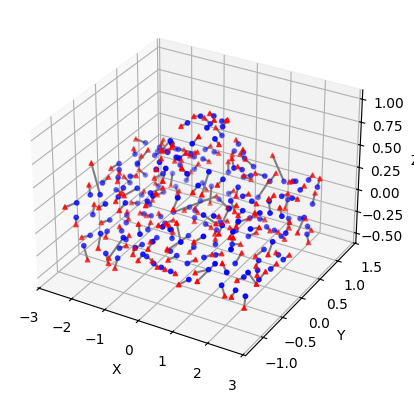

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(point_moved[:, 0], point_moved[:, 1], point_moved[:, 2], marker='^', s=10, color="red")
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, color="blue")

# 같은 인덱스끼리 선으로 연결
for i in range(len(points)):
    ax.plot([sorted_points[i, 0], point_moved[i, 0]], 
            [sorted_points[i, 1], point_moved[i, 1]], 
            [sorted_points[i, 2], point_moved[i, 2]], color="gray", linestyle="-")

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

점들의 법선벡터 구하고 법선벡터의 수직인 벡터 차분

In [54]:
import open3d as o3d
import numpy as np

# 이미 추출된 점들을 numpy 배열로 변환
# points = np.array([[x1, y1, z1], [x2, y2, z2], ...])  # 추출된 표면의 점들

# 포인트 클라우드 생성
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# 법선 벡터 계산 (k-인접한 이웃을 통해 법선 추정)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50))

# 계산된 법선 벡터 출력
normals = np.asarray(pcd.normals)
print(normals)

[[ 1.05645223e-01  4.61842439e-01 -8.80647857e-01]
 [-1.30106757e-01 -4.29086732e-03 -9.91490706e-01]
 [-2.83744861e-02  1.40561115e-01  9.89665328e-01]
 [-8.64215328e-02 -1.00719362e-01  9.91154342e-01]
 [-8.61427393e-02 -4.48618966e-02 -9.95272244e-01]
 [-2.75215544e-01 -2.46724742e-02  9.61065905e-01]
 [ 1.15962842e-01  2.35569744e-01  9.64914253e-01]
 [-1.10051613e-01 -2.05824763e-01  9.72381000e-01]
 [ 1.10414572e-01 -2.11062686e-01 -9.71216333e-01]
 [-9.05147388e-02 -1.76871157e-01 -9.80063098e-01]
 [ 1.78433929e-01  1.53383025e-01  9.71923341e-01]
 [-1.90664919e-01 -5.29312097e-02 -9.80227104e-01]
 [-2.70271855e-01 -6.82003803e-01  6.79576292e-01]
 [ 7.94016994e-03 -1.25214075e-01 -9.92097974e-01]
 [-3.80396899e-02  1.96199903e-01  9.79825791e-01]
 [-7.15608757e-02  4.55174020e-01  8.87522198e-01]
 [ 4.31639845e-02 -4.92463025e-01 -8.69262354e-01]
 [-5.31306820e-01 -1.49346810e-01 -8.33911622e-01]
 [-2.23453421e-01  1.50618424e-01  9.63007092e-01]
 [-6.76301161e-02 -1.72933916e-

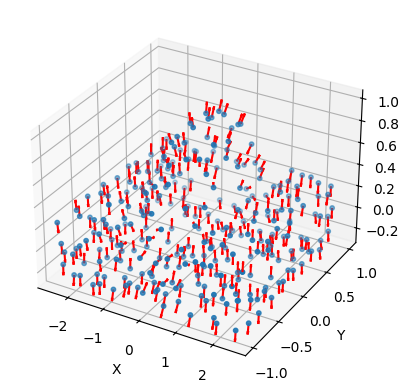

In [56]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=0, azim=120)

# 플롯 보여주기
plt.show()